In [1]:
import pandas as pd
import numpy as np

tables = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C")
table = tables[10]
table.replace('—', np.nan, inplace=True)
table.fillna(0, inplace=True)
table[['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']] = \
    table[['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']].astype(float)
table[['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']] = \
    table[['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']].apply(lambda x: x/10)
table.replace(0, np.nan, inplace=True)
table.drop(27, inplace=True)
table.fillna(value=table.mean(numeric_only=True).round(1), inplace=True)
table

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.1,8.0
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,8.0
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


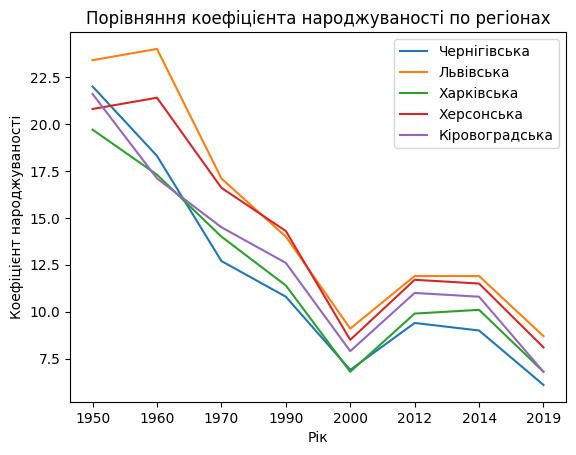

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

year = list(table.keys()[1::])
fig, axs = plt.subplots()
axs.plot(year, table.loc[table['Регіон'] == 'Чернігівська'][year].values.flatten(), label=table.loc[table['Регіон'] == 'Чернігівська'][['Регіон']].values.flatten()[0])
axs.plot(year, table.loc[table['Регіон'] == 'Львівська'][year].values.flatten(), label=table.loc[table['Регіон'] == 'Львівська'][['Регіон']].values.flatten()[0])
axs.plot(year, table.loc[table['Регіон'] == 'Харківська'][year].values.flatten(), label=table.loc[table['Регіон'] == 'Харківська'][['Регіон']].values.flatten()[0])
axs.plot(year, table.loc[table['Регіон'] == 'Херсонська'][year].values.flatten(), label=table.loc[table['Регіон'] == 'Херсонська'][['Регіон']].values.flatten()[0])
axs.plot(year, table.loc[table['Регіон'] == 'Кіровоградська'][year].values.flatten(), label=table.loc[table['Регіон'] == 'Кіровоградська'][['Регіон']].values.flatten()[0])
plt.legend()
plt.xlabel('Рік')
plt.ylabel('Коефіцієнт народжуваності')
plt.title('Порівняння коефіцієнта народжуваності по регіонах')
plt.show()

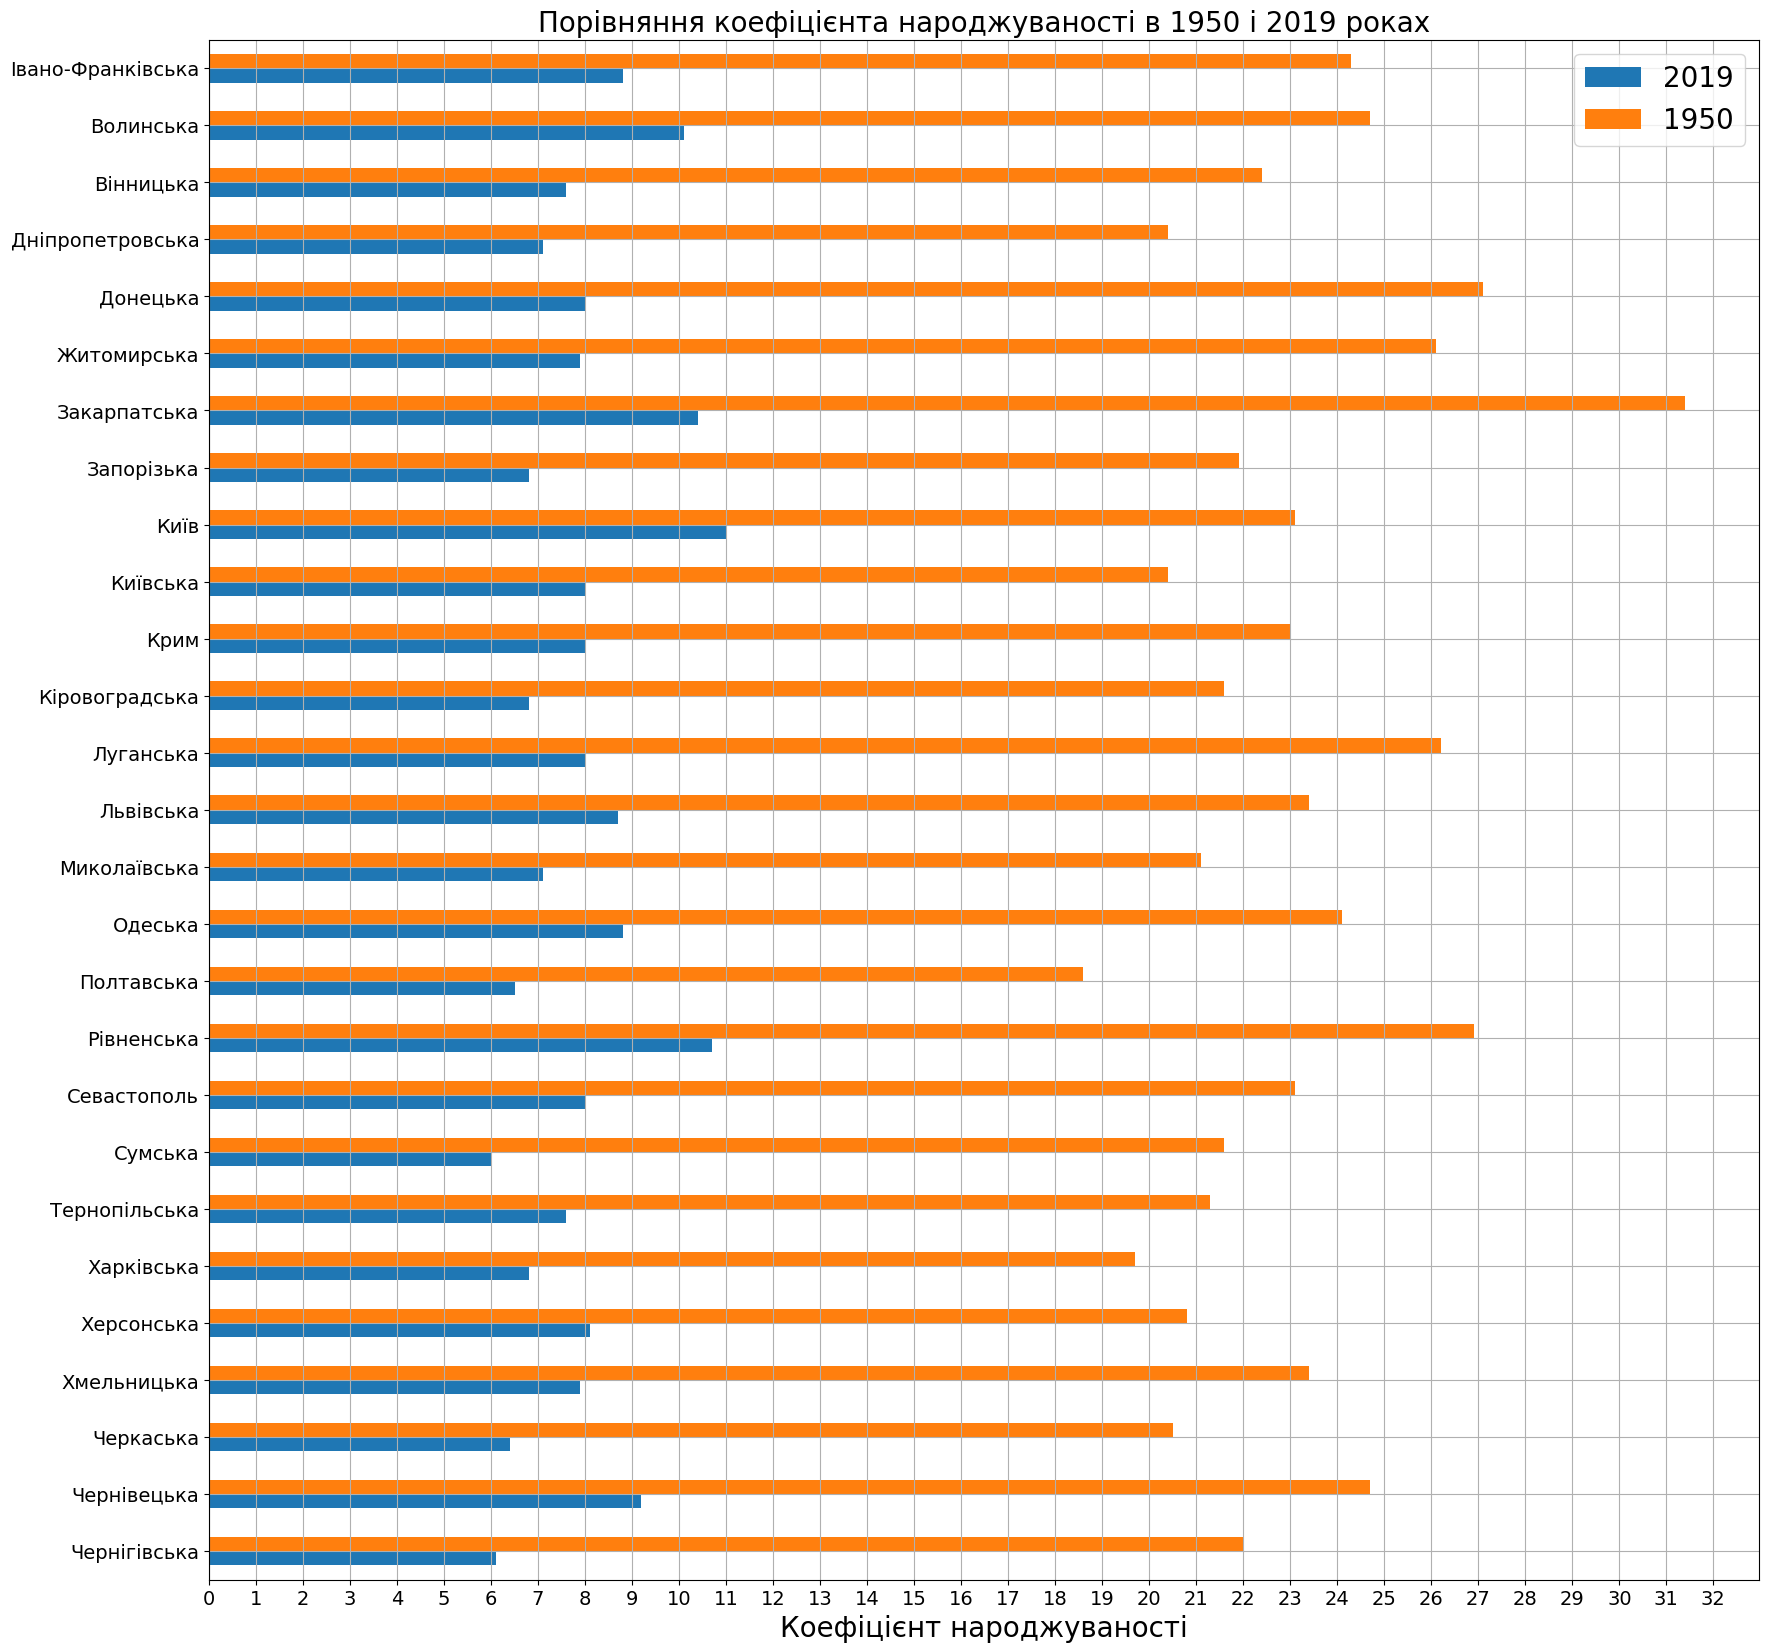

In [84]:
table[['Регіон', '2019', '1950']].sort_values(by=['Регіон'], ascending=False).plot(kind='barh', x='Регіон')
plt.xlabel('Коефіцієнт народжуваності', fontsize=20)
plt.ylabel('')
plt.xticks(range(33), fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.title('Порівняння коефіцієнта народжуваності в 1950 і 2019 роках', fontsize=20)
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize=20)
plt.show()

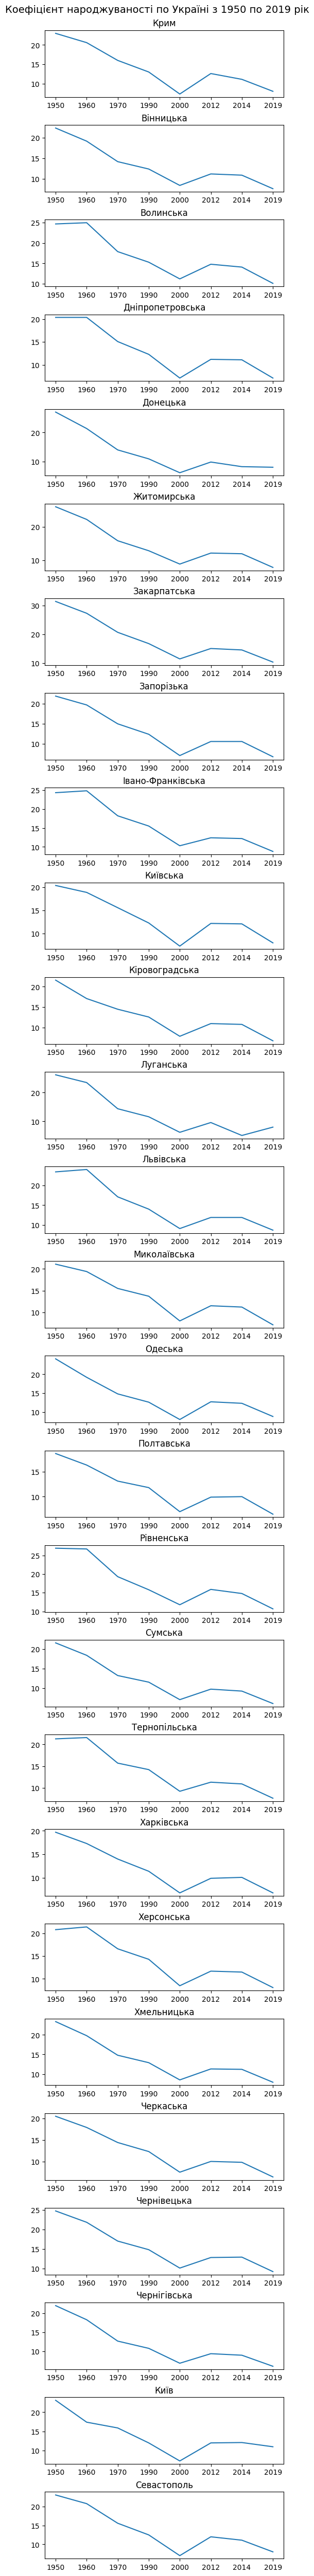

In [73]:
year = list(table.keys()[1::])
row_count = table.shape[0]
fig, axs = plt.subplots(row_count, 1, constrained_layout=True)
fig.suptitle('Коефіцієнт народжуваності по Україні з 1950 по 2019 рік', fontsize=14)
for i in range(row_count):
    axs[i].plot(year, table.loc[table['Регіон'] == table['Регіон'][i]][year].values.flatten(), 
                label=table.loc[table['Регіон'] == table['Регіон'][i]][['Регіон']].values.flatten()[0])
    axs[i].set_title(table['Регіон'][i])
    axs[i].legend().set_visible(False)
plt.rcParams["figure.figsize"] = (5, 50)
plt.show()
